# The Hamblog
By Kyle Hambrook

# Statistical Inference for Correlation: Asymptotic Methods

### I. Statistical Inference Problems for Correlation $\rho$

Let $X$ and $Y$ be random variables. We consider two statistical inference problems for the correlation $\rho = \rho(X,Y)$. 

Problem 1: Test the null hypothesis $H_0$: $\rho = 0$ by calculating a $p$-value.

Problem 2: Determine a confidence interval that contains $\rho$ with prescribed probability.

In this post, we consider asymptotic methods for these problems. 

### III. Asymptotic Distribution of Sample Correlation $r_n$

Let $X_1,\ldots,X_n$ and $Y_1,\ldots,Y_n$ be random samples of $X$ and $Y$. Let $$r_n = r_n(X_1,\ldots,X_n,Y_1,\ldots,Y_n)$$ be the sample correlation.

<strong> Theorem 1. </strong>
Assume $E(X^4) < \infty$, $E(Y^4) < \infty$. Let $(X_i)_{i=1}^{\infty} \sim_{iid} X$ and $(Y_i)_{i=1}^{\infty} \sim_{iid} Y$ be infinite random samples. Then
$$
\sqrt{n}(r_n-\rho) \rightarrow_d N_1(0,\phi^2),
$$
where $\phi$ is the positive number defined by 
$$
\phi^2 = \frac{1}{4}\rho^2( E(X_{\ast}^4) + E(Y_{\ast}^4) + 2E(X_{\ast}^2 Y_{\ast}^2) ) 
- \rho(  E(X_{\ast}^3 Y_{\ast}) +  E(X_{\ast} Y_{\ast}^3)  )   +   E(X_{\ast}^2 Y_{\ast}^2),
$$
with $X_{\ast} = (X - E (X))/\sqrt{\text{Var} (X)}$ and $Y_{\ast} = (Y - E (Y))/\sqrt{\text{Var} (Y)}$.

<strong> Remark. </strong> In general, the variance of the limiting distribution depends on higher moments of $(X,Y)$. However, if $\rho = 0$, the variance of the limiting distribution is 
$$
\phi^2 = E(X_{\ast}^2 Y_{\ast}^2) 
= E(X_{\ast}^2) E(Y_{\ast}^2) 
= \frac{\text{Var}(X)}{\text{Var}(X)} \cdot \frac{\text{Var}(Y)}{\text{Var}(Y)}
=1
$$

### IV. Hypothesis Test Based on Sample Correlation $r_n$

Let $r_n'$ denote an observed value (or realization) of $r_n$. Precisely, $$r_n' = r_n(X_1(\omega'),\ldots, X_n(\omega'),Y_1(\omega'),\ldots,Y_n(\omega'))$$ for some fixed outcome $\omega'$ in the sample space.

$H_0$ stands for the statement $\rho = 0$. It is called the null hypothesis. 

Informally, the $p$-value is the probability of $r_n$ being at least as extreme as the observed value $r_n'$ assuming $H_0$ is true. What "extreme" means depends on the distribution of $r_n$. We give a precise defintion of the $p$-value below, but first we discuss its meaning.

A small $p$-value is often interpreted as evidence against the null hypothesis $H_0$. However, let us emphasize what the $p$-value is not. It is __not__ the probability that $H_0$ is true. It is __not__ the probability of $H_0$ given the observed data. <!--It is __not__ the probability of $r_n$ being equal to the observed value assuming that $H_0$ is true.-->

The following figure (borrowed from wikipedia) helps illustrate the concept of $p$-value.

<img src="https://upload.wikimedia.org/wikipedia/commons/3/3a/P-value_in_statistical_significance_testing.svg" alt="alt text" style="width: 400px;" title="Logo Title Text 1">

To compute the $p$-value, we need the distribution of $r_n$. We use the asymptotic approximation suggested by Theorem 1: $$r_n \sim N(0,n) \text{ given } H_0.$$

If $r_n' > 0$, the one-sided $p$-value is
$$
P(r_n \geq r_n' \; | \;  H_0).
$$
It is the area of the right-tail region under the standard normal pdf to the right of $\sqrt{n} r_n'$ (assuming the asymptotic approximation for the distribution of $r_n$). 

If $r_n' < 0$, the one-sided $p$-value is
$$
P(r_n \leq r_n' \; | \;  H_0)
$$
It is the area of the left-tail region under the standard normal pdf to the left of $\sqrt{n} r_n'$ (assuming the asymptotic approximation for the distribution of $r_n$). 

The two-sided $p$-value is
$$
P(r_n \leq -|r_n'| \text{ or } r_n \geq |r_n'|  \; | \;  H_0).
$$ 
It is the area of the left-tail region under the standard normal pdf to the left of $-\sqrt{n}|r_n'|$ plus the area of the right-tail region to the right of $\sqrt{n}|r_n'|$ (assuming the asymptotic approximation for the distribution of $r_n$). 

For simplicity, let's focus on the one-sided $p$-value when $r_n' < 0$. For brevity, denote the $p$-value by
$$
p_n = P(r_n \leq r_n' \; | \;  H_0).
$$

By Theorem 1, we know
$$
\lim_{n \to \infty} p_n = \Phi(\sqrt{n} r_n').
$$
where $\Phi$ is the standard normal cdf. The asymptotic approximation is
$$
p_n = \Phi(\sqrt{n} r_n').
$$

### V. Python Example 1

In Python Example 1, we will test the asymptotic approximation by repeated sampling. Here are the steps:

1. Choose a distribution for $(X,Y)$ with $\rho(X,Y) = 0$ ($H_0$ true). We'll use a multi-variate normal distribution.
2. Choose a value of $n$.  
3. Set $\sqrt{n}r_n' = -2$.
4. Draw a size-$n$ sample of $(X,Y)$ and compute $r_n$. This is $r_n'$ 
5. Repeat step 4 many times. Say $N$ times in total.
5. Record $K$ = number of times where $r_n \leq r_n'$. 
6. Treat $K/N$ as $p_n = P(r_n \leq r_n' \; | \;  H_0)$. By the law of large numbers, $K/N$ converges to $p_n$ as $N$ gets large.
7. Repeat steps 2 to 6 several times.
8. Plot $p_n$ vs $n$. Also draw the horizontal line for $\Phi(\sqrt{n}r_n') = \Phi(-1.96) \approx 0.025$. 

The plot will indicate the convergence
$$
p_n \to \Phi(\sqrt{n} r_n')
$$
is fairly slow.

(X,Y) multivariate normal, true correlation rho(X,Y) =  0
plot p-value p_n vs sample size n
horizontal line is Phi(sqrt(n)r'_n) = \Phi(-1.96) =  0.0249978951482


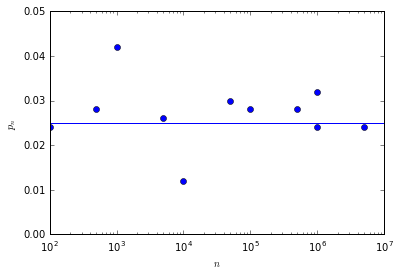

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import math

def samp_corr( X,Y ):
    #X,Y vectors length n
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)
    numerator = np.mean((X-mean_X)*(Y-mean_Y))
    denominator = np.sqrt(np.mean((X-mean_X)**2) * np.mean((Y-mean_Y)**2))
    return numerator/denominator;

rho = 0
cov = np.array( [[1,rho],[rho,1]] )

pn = []
samplesizes = [10**2,10**3,10**4,10**5,10**6,5*10**2,5*10**3,5*10**4,5*10**5,5*10**6]
for n in samplesizes:
    a=-1.96
    rn_prime = a/np.sqrt(n)
    N = 500
    K=0.0
    for j in xrange(1,N+1):
        XY = np.random.multivariate_normal([0,0],cov,n)
        X = XY[:,0]
        Y = XY[:,1]
        rn = samp_corr(X,Y)
        if rn <= rn_prime:
            K=K+1
    pn.append(K/N)
Phi = norm.cdf(a)

print "(X,Y) multivariate normal, true correlation rho(X,Y) = ",rho
print "plot p-value p_n vs sample size n"
print "horizontal line is Phi(sqrt(n)r'_n) = \Phi(-1.96) = ", Phi
    
fig = plt.figure()
ax = plt.gca()
plt.plot(samplesizes,pn,"o")
plt.axhline(Phi)
plt.ylim([0,0.05])
ax.set_xlabel(r'$n$')
ax.set_ylabel(r'$p_n$')
ax.set_xscale('log')  
        


### VI. Python Example 2

In Python Example 2, we will test the asymptotic approximation another way. To explain the test, first we need some theory.

Remember that a random variable is just a (measurable) function from the sample space to the real numbers. The $p$-value $p_n$ can be viewed as a random variable.  To each outcome $\omega'$ in the sample space, assign the real number
$$
p_n(\omega') = P(r_n \leq r_n' \; | \;  H_0)
$$
where $r_n' = r_n(X_1(\omega'),\ldots, X_n(\omega'),Y_1(\omega'),\ldots,Y_n(\omega'))$.

<strong>Theorem 2. </strong>
The $p$-value $p_n$ is uniformly distributed on $[0,1]$ under the null hypothesis: $P(p_n \leq \alpha \; | \;  H_0) = \alpha$ for all $\alpha \in [0,1]$.

Now fix $\alpha \in (0,1)$. If $p_n \leq \alpha$ and the null hypothesis $H_0$ is true, we say we have a Type 1 error at significance level $\alpha$. Remember that the statement $p_n \leq \alpha$ is viewed as stronger evidence against the null hypothesis when $\alpha$ is smaller. So a Type 1 error is roughly "$p$-value says $H_0$ false but $H_0$ is actually true." 

According to Theorem 2, the probability of a Type 1 error at signifiance level $\alpha$ is 
$$P(p_n \leq \alpha \; | \;  H_0) = \alpha.$$ 
<!--We want to compare $P(p_n \leq \alpha) = \alpha$ to $P(\Phi(\sqrt{n} r_n') \leq \alpha)$-->
Since the asymptotic approximation is 
$$
p_n \to \Phi(\sqrt{n} r_n'), 
$$
We want to compare $P(\Phi(\sqrt{n} r_n' ) \leq \alpha \; | \;  H_0)$ to $\alpha$. Here's how will we do it:

1. Choose a distribution for $(X,Y)$ with $\rho(X,Y) = 0$ ($H_0$ true). We'll use a multi-variate normal distribution
2. Choose $\alpha \in (0,1)$. 
3. Choose a value of $n$.
4. Sample from $(X,Y)$ and compute $\Phi( \sqrt{n} r_n')$
5. Repeat Step 4 $N$ times. Record $K$ = number of times $\Phi( \sqrt{n} r_n') \leq \alpha$.
6. Treat $K / N$ as $P(\Phi( \sqrt{n} r_n') \leq \alpha \; | \;  H_0)$. (By the law of large numbers, $K/N$ converges to $P(\Phi( \sqrt{n} r_n') \leq \alpha \; | \;  H_0)$ as $N$ gets large.)
7. Repeat 3-6 for several values of $n$. 
8. Plot $P(\Phi( \sqrt{n} r_n') \leq \alpha \; | \;  H_0)$ vs $n$. Also plot the horizontal line $\alpha$ vs $n$. 
9. Repeat 2 to 8 for several values of $\alpha$.



(X,Y) multivariate normal, true correlation rho(X,Y) =  0
alpha =  0.05
plot Prob(alpha,n) = P(Phi(sqrt(n) r'_n ) <= alpha | H_0) vs sample size n


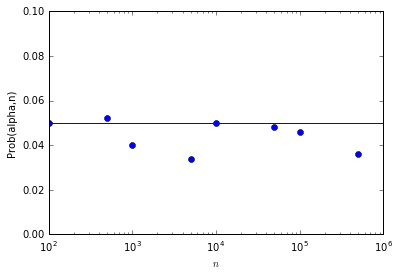

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import math

def samp_corr( X,Y ):
    #X,Y vectors length n
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)
    numerator = np.mean((X-mean_X)*(Y-mean_Y))
    denominator = np.sqrt(np.mean((X-mean_X)**2) * np.mean((Y-mean_Y)**2))
    return numerator/denominator;

rho = 0
cov = np.array( [[1,rho],[rho,1]] )


#alphavalues = [0.01,0.05,0.1]
alpha = 0.05
samplesizes = [10**2,10**3,10**4,5*10**2,5*10**3,5*10**4,10**5,5*10**5]
prob_n = []
for n in samplesizes: 
    N=500
    K=0.0
    for j in xrange(1,N+1):
        XY = np.random.multivariate_normal([0,0],cov,n)
        X = XY[:,0]
        Y = XY[:,1]
        rn_prime = samp_corr(X,Y)
        if norm.cdf(np.sqrt(n)*rn_prime) <= alpha:
            K=K+1
    prob_n.append(K/N)
        
print "(X,Y) multivariate normal, true correlation rho(X,Y) = ",rho
print "alpha = ", alpha 
print "plot P(Phi(sqrt(n) r'_n ) <= alpha | H_0) vs sample size n"
fig = plt.figure()
ax = plt.gca()
plt.plot(samplesizes,prob_n,"o")
plt.axhline(alpha)
plt.ylim([0,alpha*2])
ax.set_xlabel(n)
#ax.set_ylabel("Prob(alpha,n)")
ax.set_xscale('log') 

### VII. Confidence Interval Based on Sample Correlation

Confidence interval. Issue because of $\phi$. Estimate it.

Let $\theta \in \mathbb{R}$ be a parameter for the distribution of $X$. 
<!--Suppose $T$ is an estimator of $\theta$.-->
Let $I(T)$ be an interval whose endpoints are functions of $T$. 

$I(T)$ is called a $95\%$ confidence interval for $\theta$ based on $T$ if $P(\theta \in I(T)) \geq 0.95$. For $\alpha \in (0,1)$, $I(T)$ is called a $(1-\alpha)\%$ confidence interval for $\theta$ based on $T$ if $P(\theta \in I(T)) \geq 1-\alpha$. 

Obviously, $\mathbb{R}$ is a $(1-\alpha)100\%$ confidence interval for every $\alpha \in (0,1)$. We usually want the smallest $(1-\alpha)100\%$ confidence interval possible. We also often want the confidence interval to be centered at $T$.

__Remark.__ The hypothesis test for $\rho = \rho_0$, where $\rho_0$ is a fixed non-zero number, has the same issue.

Another solution is in the next post. Fisher transformation.

Unfortunately, the $\phi$ on the right-hand side means we can't compute this approximation. To overcome this, we will estimate 
$$
\phi^2 = E(X_{\ast}^2 Y_{\ast}^2) = E
$$
by 
$$
\widehat{\phi^2} = \frac{1}{n} \sum_{i=1}^{n} 
$$